In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# We want to explore the user behaviour of a successful C2C fashion platform (98k users)
# The dataset used was found on Kaggle (https://www.kaggle.com/jmmvutu/eda-online-c2c-fashion-store-user-behaviour)
df = pd.read_csv('/Users/jsialell/Ironhack/project_curry/Data/dataset.csv')

SyntaxError: invalid syntax (<ipython-input-1-dfa9d5e25370>, line 2)

In [3]:
df.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,-7279641312655250028,user,Etats-Unis,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,us
1,-1456013578740053406,user,Allemagne,de,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,de
2,9006282053848196165,user,Suède,en,3,8,0,0,0,0.0,...,mr,True,False,True,True,689,3205,106.83,8.9,se
3,-7154634866120535654,user,Turquie,en,3,8,0,0,0,0.0,...,mrs,False,False,False,True,709,3205,106.83,8.9,tr
4,2858299215060733023,user,France,en,3,8,0,0,0,0.0,...,mr,True,False,True,True,709,3205,106.83,8.9,fr


In [4]:
# Segmenting the users into 4 subgroups:
# 1. exclusive buyers: those who have bought at least 1 product but haven't sold anything
# 2. exclusive sellers: those who have sold at least 1 product but haven't bought anything
# 3. both buyers and sellers: those who have bought at least 1 product and sold at least 1 product
# 4. prospective users: those who haven't bought and sold anything but who are actively interacting with other accounts

df_active= df.loc[(df["productsListed"] !=0)|(df["productsSold"] !=0)|(df["productsWished"]!=0)|(df["productsBought"]!=0)|(df["socialProductsLiked"]!=0)|(df["socialNbFollows"]>8)]
df_active.shape

(22288, 24)

In [5]:
# 1st Segment: exclusive buyers: those who have bought at least 1 product
df_exclusive_buyers = (df_active
                       .loc[(df['productsSold'] == 0) & (df['productsBought'] != 0)]
                       .assign(user_type='exclusive_buyer'))
df_exclusive_buyers.describe()
# The describe function provides us with key information concerning this segment:
# 4857 active users are exclusive buyers who buy in average 2.5 products (Median=1, IQR= 2). => Most exclusive buyers are small buyers.

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,4.857000e+03,4857.000000,4857.000000,4857.000000,4857.000000,4857.0,4857.0,4857.000000,4857.000000,4857.000000,4857.000000,4857.000000,4857.000000,4857.000000
mean,-6.787677e+16,4.651637,8.928557,33.405806,0.051884,0.0,0.0,15.280008,2.478896,1.729669,313.204653,3068.391806,102.279638,8.523212
std,5.312927e+18,3.600481,8.110722,269.345065,0.445767,0.0,0.0,81.531676,4.577632,0.459670,272.887611,167.251170,5.574870,0.464897
min,-9.219834e+18,3.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.595531e+18,3.000000,8.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,31.000000,2857.000000,95.230000,7.940000
50%,-5.360249e+16,4.000000,8.000000,1.000000,0.000000,0.0,0.0,0.000000,1.000000,2.000000,249.000000,3197.000000,106.570000,8.880000
75%,4.475140e+18,5.000000,8.000000,12.000000,0.000000,0.0,0.0,4.000000,2.000000,2.000000,628.000000,3201.000000,106.700000,8.890000
max,9.221188e+18,57.000000,482.000000,16040.000000,12.000000,0.0,0.0,2635.000000,93.000000,3.000000,709.000000,3205.000000,106.830000,8.900000


In [6]:
# 2nd Segment: exclusive sellers: those who have bought at least 1 product
df_exclusive_sellers = (df_active
                        .loc[(df['productsSold'] != 0) & (df['productsBought'] == 0)]
                        .assign(user_type='exclusive_seller'))
df_exclusive_sellers.describe()
# The describe function provides us with key information concerning this segment:
# 1474 active users are exclusive sellers who buy in average 5.6 products (Median=2, IQR=3). => Most exclusive sellers are small sellers.

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,1.474000e+03,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.0,1474.000000,1474.000000,1474.00000,1474.000000,1474.000000
mean,4.261365e+16,11.329715,29.096336,56.278155,3.609905,5.581411,37.834057,3.849389,0.0,1.824966,230.961330,3061.93555,102.064328,8.505488
std,5.324734e+18,26.642000,431.964384,1367.880067,12.060120,12.909017,44.462528,56.764258,0.0,0.534512,238.738821,168.84189,5.627837,0.469363
min,-9.221801e+18,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,11.000000,2852.00000,95.070000,7.920000
25%,-4.534347e+18,4.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,2.000000,17.000000,2857.00000,95.230000,7.940000
50%,1.995009e+16,6.000000,8.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.0,2.000000,125.000000,3196.00000,106.530000,8.880000
75%,4.568205e+18,10.000000,8.000000,4.000000,3.000000,4.000000,90.000000,0.000000,0.0,2.000000,418.000000,3201.00000,106.700000,8.890000
max,9.204738e+18,744.000000,13764.000000,51671.000000,217.000000,170.000000,100.000000,1842.000000,0.0,3.000000,709.000000,3205.00000,106.830000,8.900000


In [7]:
# 3rd Segment: both buyers and sellers: those who have bought at least 1 product and sold at least 1 product
df_buyers_sellers = (df_active
                     .loc[(df['productsSold'] != 0) & (df['productsBought'] != 0)]
                     .assign(user_type='buyer_and_seller'))
df_buyers_sellers.describe()
# The describe function provides us with key information concerning this segment:
# 562 active users are both buyers and sellers with both higher average and mean values for the number of products sold and bought. 
# => This segment seems to be the most active and the platform: the behaviour of these users deserves to be looked into more thoroughly.

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,5.620000e+02,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000
mean,3.286952e+17,13.209964,12.604982,107.256228,4.927046,6.761566,43.736477,56.179715,8.836299,1.832740,85.104982,3068.361210,102.278470,8.523167
std,5.214071e+18,16.317987,23.445021,407.349454,17.147364,15.329538,44.582841,179.375481,25.523710,0.496472,147.735870,167.623175,5.587301,0.465811
min,-9.211565e+18,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.258622e+18,5.000000,8.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,11.000000,2857.000000,95.230000,7.940000
50%,7.869879e+17,8.000000,8.000000,18.000000,1.000000,2.000000,40.800000,5.000000,3.000000,2.000000,17.000000,3197.000000,106.570000,8.880000
75%,4.530167e+18,14.000000,10.000000,74.750000,3.000000,6.000000,93.000000,25.000000,7.000000,2.000000,67.750000,3201.000000,106.700000,8.890000
max,9.187045e+18,147.000000,450.000000,5979.000000,244.000000,174.000000,100.000000,1916.000000,405.000000,3.000000,696.000000,3205.000000,106.830000,8.900000


In [8]:
# 4th Segment: exclusive social users: those who haven't bought and sold anything but who are actively interacting with other accounts
df_prospective_users = (df_active
                        .loc[(df['productsSold'] == 0) & (df['productsBought'] == 0)]
                        .assign(user_type='prospective_user'))
df_prospective_users.describe()

# The descibe function provides us with key information concerning this segment:
# 15395 active users are prospective users: they haven't bought and sold anything yet but have either products listed for sell or have actively interacted with other accounts. 

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,1.539500e+04,15395.000000,15395.000000,15395.000000,15395.000000,15395.0,15395.0,15395.000000,15395.0,15395.000000,15395.000000,15395.000000,15395.000000,15395.000000
mean,4.773451e+16,3.538097,8.259760,8.560247,0.057616,0.0,0.0,2.799545,0.0,1.842027,439.331601,3061.660214,102.055186,8.504572
std,5.341006e+18,1.944908,1.371024,39.732231,0.478313,0.0,0.0,17.826188,0.0,0.386182,258.107789,168.745667,5.624636,0.469097
min,-9.223101e+18,3.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,-4.543043e+18,3.000000,8.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,2.000000,191.000000,2857.000000,95.230000,7.940000
50%,7.042313e+16,3.000000,8.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,2.000000,531.000000,3196.000000,106.530000,8.880000
75%,4.691885e+18,3.000000,8.000000,5.000000,0.000000,0.0,0.0,1.000000,0.0,2.000000,693.000000,3201.000000,106.700000,8.890000
max,9.223331e+18,36.000000,77.000000,1590.000000,25.000000,0.0,0.0,1225.000000,0.0,3.000000,709.000000,3205.000000,106.830000,8.900000


In [9]:
# Reseting the dataframe for active users (now with a new column 'user_type')
user_segment = [df_exclusive_buyers, df_exclusive_sellers, df_buyers_sellers, df_prospective_users]
df_active = pd.concat(user_segment)
df_active.shape

(22288, 25)

In [10]:
df_active

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode,user_type
51,-6589093921826008799,user,Etats-Unis,en,3,9,1,0,0,0.0,...,False,False,False,True,26,3205,106.83,8.9,us,exclusive_buyer
85,-937288556484695351,user,Suède,en,5,8,0,0,0,0.0,...,False,False,False,True,543,3205,106.83,8.9,se,exclusive_buyer
95,7144186809315241123,user,Canada,en,4,10,1,0,0,0.0,...,True,True,False,True,208,3205,106.83,8.9,ca,exclusive_buyer
102,4994268169579335625,user,Royaume-Uni,en,3,8,0,0,0,0.0,...,False,False,False,True,27,3205,106.83,8.9,gb,exclusive_buyer
114,4907046938384800140,user,Etats-Unis,en,28,29,0,0,0,0.0,...,True,False,True,False,15,3205,106.83,8.9,us,exclusive_buyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98883,4686499517041021923,user,Etats-Unis,en,7,9,0,0,0,0.0,...,False,False,False,True,708,3204,106.80,8.9,us,prospective_user
98889,4508710134224075356,user,France,fr,3,8,1,0,0,0.0,...,False,False,False,True,477,3204,106.80,8.9,fr,prospective_user
98896,4715935376764926056,user,Allemagne,en,3,8,10,0,0,0.0,...,True,False,True,True,15,3204,106.80,8.9,de,prospective_user
98901,7257878909040060228,user,Espagne,es,3,8,31,0,0,0.0,...,False,False,False,True,13,3204,106.80,8.9,es,prospective_user


In [11]:
# Creating a new column for the operating system (Android, iOS, both or browser)
df_active = df_active.assign(OS=np.where((df_active["hasAndroidApp"]&df_active["hasIosApp"]==True),"Both Apps",(np.where((df_active["hasAndroidApp"]==True),"Android",(np.where((df_active["hasIosApp"]==True),"iOS","Browser"))))))

In [12]:
# Create a new column for the ratio (products bought / products sold) for all users
df_active = df_active.assign(ratioBuySell=df_active["productsBought"]/df_active["productsSold"])

In [13]:
# Export DataFrame for further plotting on Tableau
# df_active.to_csv("df_active.csv")

In [14]:
# Create a DataFrame with all active buyers (exclusive buyer + buyers&sellers)
buyers = [df_exclusive_buyers, df_buyers_sellers]
df_buyers = pd.concat(buyers)[['identifierHash', 'user_type','productsBought']]
# Create a new column providing information on the range of products boughts
df_buyers = df_buyers[df_buyers['productsBought'] > 0].assign(productsBought_range=pd.NA)
df_buyers.loc[df_buyers['productsBought'].between(1,5, inclusive=True), 'productsBought_range'] = "1-5"
df_buyers.loc[df_buyers['productsBought'].between(6,10, inclusive=True), 'productsBought_range'] = "6-10"
df_buyers.loc[df_buyers['productsBought'].between(11,20, inclusive=True), 'productsBought_range'] = "11-20"
df_buyers.loc[df_buyers['productsBought'].between(21,30, inclusive=True), 'productsBought_range'] = "21-30"
df_buyers.loc[df_buyers['productsBought'].gt(31), 'productsBought_range'] = "31+"
df_buyers

,identifierHash,user_type,productsBought,productsBought_range
51,-6589093921826008799,exclusive_buyer,1,1-5
85,-937288556484695351,exclusive_buyer,1,1-5
95,7144186809315241123,exclusive_buyer,1,1-5
102,4994268169579335625,exclusive_buyer,2,1-5
114,4907046938384800140,exclusive_buyer,6,6-10
...,...,...,...,...
98260,-5414959342816599813,buyer_and_seller,1,1-5
98352,-1780456174896106635,buyer_and_seller,1,1-5
98368,1844013789737284769,buyer_and_seller,17,11-20
98442,3179447064315962304,buyer_and_seller,1,1-5


In [15]:
# Create a DataFrame with all active sellers
sellers = [df_exclusive_sellers, df_buyers_sellers]
df_sellers = pd.concat(sellers)[['identifierHash', 'user_type', 'productsSold']]
# Create a new column providing information on the range of products boughts
df_sellers = df_sellers[df_sellers['productsSold'] > 0].assign(productsSold_range=pd.NA)
df_sellers.loc[df_sellers['productsSold'].between(1,5, inclusive=True), 'productsSold_range'] = "1-5"
df_sellers.loc[df_sellers['productsSold'].between(6,10, inclusive=True), 'productsSold_range'] = "6-10"
df_sellers.loc[df_sellers['productsSold'].between(11,20, inclusive=True), 'productsSold_range'] = "11-20"
df_sellers.loc[df_sellers['productsSold'].between(21,30, inclusive=True), 'productsSold_range'] = "21-30"
df_sellers.loc[df_sellers['productsSold'].gt(31), 'productsSold_range'] = "31+"
df_sellers

,identifierHash,user_type,productsSold,productsSold_range
133,-4975676516338518373,exclusive_seller,1,1-5
164,-5922910413286749505,exclusive_seller,3,1-5
242,2070806682096194894,exclusive_seller,1,1-5
614,1675020017057075308,exclusive_seller,3,1-5
1084,-5427472487749231410,exclusive_seller,2,1-5
...,...,...,...,...
98260,-5414959342816599813,buyer_and_seller,20,11-20
98352,-1780456174896106635,buyer_and_seller,2,1-5
98368,1844013789737284769,buyer_and_seller,2,1-5
98442,3179447064315962304,buyer_and_seller,1,1-5


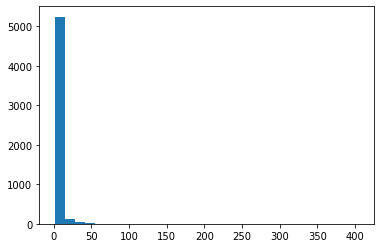

In [16]:
# Histogram for products bought -> Plotting will be done on Tableau 
plt.hist(df_buyers['productsBought'], bins = 30)
plt.show()

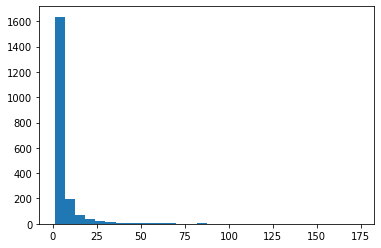

In [17]:
# Histogram for products sold -> Plotting will be done on Tableau 
plt.hist(df_sellers['productsSold'], bins = 30)
plt.show()

In [18]:
# We would like to see the contribution of top sellers for the C2C-platform. 
# To do so, we'll create a new top_sellers DataFrame.

# 1. sort sellers by number of products sold (descending)
top_sellers = (df_sellers
               .sort_values("productsSold", ascending=False)
               .reset_index(drop=True))
top_sellers.head()

,identifierHash,user_type,productsSold,productsSold_range
0,-1097895247965112460,buyer_and_seller,174,31+
1,2347567364561867620,exclusive_seller,170,31+
2,6870940546848049750,buyer_and_seller,163,31+
3,-4640272621319568052,exclusive_seller,152,31+
4,-5175830994878542658,exclusive_seller,125,31+


In [19]:
# 2. rank sellers
top_sellers = (top_sellers
               .assign(rank=top_sellers.index + 1)
# 3. cumulative number of products sold
               .assign(cum_products_sold=top_sellers["productsSold"].cumsum()))
top_sellers

,identifierHash,user_type,productsSold,productsSold_range,rank,cum_products_sold
0,-1097895247965112460,buyer_and_seller,174,31+,1,174
1,2347567364561867620,exclusive_seller,170,31+,2,344
2,6870940546848049750,buyer_and_seller,163,31+,3,507
3,-4640272621319568052,exclusive_seller,152,31+,4,659
4,-5175830994878542658,exclusive_seller,125,31+,5,784
...,...,...,...,...,...,...
2031,-6755763137290535309,exclusive_seller,1,1-5,2032,12023
2032,-7155414236904320737,exclusive_seller,1,1-5,2033,12024
2033,1088902896900211324,exclusive_seller,1,1-5,2034,12025
2034,5365097085560214885,exclusive_seller,1,1-5,2035,12026


In [20]:
# 4. percentiles
top_sellers = (top_sellers
               .assign(top_n_perc=((top_sellers["rank"] / len(top_sellers)) * 100))
               .assign(percentile=((1 - top_sellers["rank"] / len(top_sellers)) * 100).astype(int))
# 5. contribution in terms of total products sold
               .assign(products_sold_contribution=((top_sellers["cum_products_sold"] / top_sellers["productsSold"].sum()) * 100).astype(int)))
top_sellers.head()


,identifierHash,user_type,productsSold,productsSold_range,rank,cum_products_sold,top_n_perc,percentile,products_sold_contribution
0,-1097895247965112460,buyer_and_seller,174,31+,1,174,0.049116,99,1
1,2347567364561867620,exclusive_seller,170,31+,2,344,0.098232,99,2
2,6870940546848049750,buyer_and_seller,163,31+,3,507,0.147348,99,4
3,-4640272621319568052,exclusive_seller,152,31+,4,659,0.196464,99,5
4,-5175830994878542658,exclusive_seller,125,31+,5,784,0.245580,99,6


In [21]:
# Our top 10 sellers account for 10% of total products sold
# Our top 1% sellers (top 20 sellers) account for 17% of the total products sold

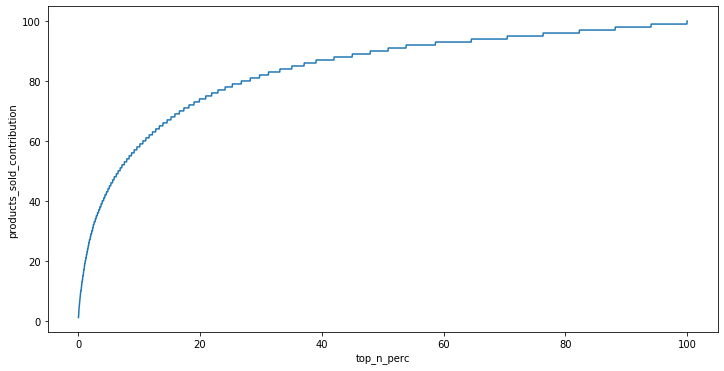

In [23]:
# Attempt: to visualize the importance of the top sellers for the platform
# Since the graph is not really self-explanatory, other alternative visualizations will be considered on Tableau
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=top_sellers,
             x="top_n_perc",
             y="products_sold_contribution");

In [24]:
# Creating a column for deciles (and the top 1% percentile) for further vizualisation on Tableau
top_sellers = top_sellers.assign(decile=pd.NA)
top_sellers.loc[top_sellers['percentile'].between(0,9.999999, inclusive=True), 'decile'] = "100"
top_sellers.loc[top_sellers['percentile'].between(10,19.999999, inclusive=True), 'decile'] = "90"
top_sellers.loc[top_sellers['percentile'].between(20,29.999999, inclusive=True), 'decile'] = "80"
top_sellers.loc[top_sellers['percentile'].between(30,39.999999, inclusive=True), 'decile'] = "70"
top_sellers.loc[top_sellers['percentile'].between(40,49.999999, inclusive=True), 'decile'] = "60"
top_sellers.loc[top_sellers['percentile'].between(50,59.999999, inclusive=True), 'decile'] = "50"
top_sellers.loc[top_sellers['percentile'].between(60,69.999999, inclusive=True), 'decile'] = "40"
top_sellers.loc[top_sellers['percentile'].between(70,79.999999, inclusive=True), 'decile'] = "30"
top_sellers.loc[top_sellers['percentile'].between(80,89.999999, inclusive=True), 'decile'] = "20"
top_sellers.loc[top_sellers['percentile'].between(90,98.999999, inclusive=True), 'decile'] = "10"
top_sellers.loc[top_sellers['percentile'].between(99,100, inclusive=True), 'decile'] = "1" # not a decile but a percentile but relevant to have
top_sellers.head()

,identifierHash,user_type,productsSold,productsSold_range,rank,cum_products_sold,top_n_perc,percentile,products_sold_contribution,decile
0,-1097895247965112460,buyer_and_seller,174,31+,1,174,0.049116,99,1,1
1,2347567364561867620,exclusive_seller,170,31+,2,344,0.098232,99,2,1
2,6870940546848049750,buyer_and_seller,163,31+,3,507,0.147348,99,4,1
3,-4640272621319568052,exclusive_seller,152,31+,4,659,0.196464,99,5,1
4,-5175830994878542658,exclusive_seller,125,31+,5,784,0.245580,99,6,1


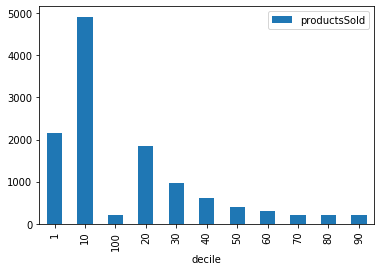

In [25]:
# Bar chart of the distribution of each deciles (+top 1%)
top_seller_deciles = (top_sellers
                      .groupby("decile")
                      .agg({"productsSold": "sum"}))
top_seller_deciles.plot(kind="bar");

In [26]:
# Create a csv file of this DataFrame for further plotting on Tableau
# top_seller_deciles.to_csv("top_seller_deciles.csv")

In [27]:
# Same procedure for top buyers
# 1. sort sellers by number of products bought (descending)
top_buyers = (df_buyers
               .sort_values("productsBought", ascending=False)
               .reset_index(drop=True))
top_buyers.head(20)

,identifierHash,user_type,productsBought,productsBought_range
0,1513245000248951841,buyer_and_seller,405,31+
1,-8963521929858247469,buyer_and_seller,279,31+
2,5666274082428572635,buyer_and_seller,174,31+
3,6048206785556031922,buyer_and_seller,115,31+
4,674361423306028463,buyer_and_seller,105,31+
5,-5547959615859653148,exclusive_buyer,93,31+
6,-1900629235154411163,exclusive_buyer,87,31+
7,-5151922057483249366,buyer_and_seller,85,31+
8,-7142437070558138673,buyer_and_seller,81,31+
9,-707350252975782312,buyer_and_seller,80,31+


In [28]:
# 2. rank buyers
top_buyers = (top_buyers
              .assign(rank=top_buyers.index + 1)
# 3. cumulative number of products bought
              .assign(cum_products_bought=top_buyers["productsBought"].cumsum()))
top_buyers.head(20)

,identifierHash,user_type,productsBought,productsBought_range,rank,cum_products_bought
0,1513245000248951841,buyer_and_seller,405,31+,1,405
1,-8963521929858247469,buyer_and_seller,279,31+,2,684
2,5666274082428572635,buyer_and_seller,174,31+,3,858
3,6048206785556031922,buyer_and_seller,115,31+,4,973
4,674361423306028463,buyer_and_seller,105,31+,5,1078
5,-5547959615859653148,exclusive_buyer,93,31+,6,1171
6,-1900629235154411163,exclusive_buyer,87,31+,7,1258
7,-5151922057483249366,buyer_and_seller,85,31+,8,1343
8,-7142437070558138673,buyer_and_seller,81,31+,9,1424
9,-707350252975782312,buyer_and_seller,80,31+,10,1504


In [29]:
# 4. percentiles
top_buyers = (top_buyers
              .assign(top_n_perc=((top_buyers["rank"] / len(top_buyers)) * 100))
              .assign(percentile=((1 - top_buyers["rank"] / len(top_buyers)) * 100).astype(int))
# 5. contribution in terms of total products sold
              .assign(products_bought_contribution=((top_buyers["cum_products_bought"] / top_buyers["productsBought"].sum()))))
top_buyers.head(60)


,identifierHash,user_type,productsBought,productsBought_range,rank,cum_products_bought,top_n_perc,percentile,products_bought_contribution
0,1513245000248951841,buyer_and_seller,405,31+,1,405,0.018454,99,0.023815
1,-8963521929858247469,buyer_and_seller,279,31+,2,684,0.036907,99,0.040221
2,5666274082428572635,buyer_and_seller,174,31+,3,858,0.055361,99,0.050453
3,6048206785556031922,buyer_and_seller,115,31+,4,973,0.073814,99,0.057215
4,674361423306028463,buyer_and_seller,105,31+,5,1078,0.092268,99,0.063389
5,-5547959615859653148,exclusive_buyer,93,31+,6,1171,0.110722,99,0.068858
6,-1900629235154411163,exclusive_buyer,87,31+,7,1258,0.129175,99,0.073974
7,-5151922057483249366,buyer_and_seller,85,31+,8,1343,0.147629,99,0.078972
8,-7142437070558138673,buyer_and_seller,81,31+,9,1424,0.166082,99,0.083735
9,-707350252975782312,buyer_and_seller,80,31+,10,1504,0.184536,99,0.088439


In [30]:
# top 13 buyers account for 10% of total products bought
# Our top 1% sellers (top 55 sellers) account for 21% of the total products bought

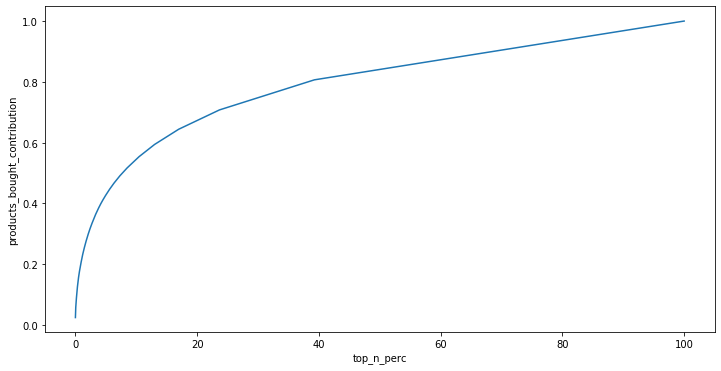

In [31]:
# Attempt: to visualize the importance of the top buyers for the platform
# Since the graph is not really self-explanatory, other alternative visualizations will be considered on Tableau
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=top_buyers,
             x="top_n_perc",
             y="products_bought_contribution");